# Exploratory Data Analysis 

This notebooks foucus on the EDA of the Jigsaw Agile Community Rules Classification Kaggle Competition

## Importing Bibs

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
from wordcloud import WordCloud

## 1.Loading Data

In [24]:
TRAIN_DF_PATH = "train.csv"
TEST_DF_PATH = "test.csv"

train_df = pd.read_csv(TRAIN_DF_PATH)
test_df = pd.read_csv(TEST_DF_PATH)
pd.set_option('display.max_colwidth', None)
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape:     {test_df.shape}")
train_df.head(5)

Training data shape: (2029, 9)
Test data shape:     (10, 8)


,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here to know more!,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",Futurology,"If you could tell your younger self something different about sex, what would that be?\n\ni AM IN A CONTEST TO WIN FUNDING FOR MY SEX POSITIVE FILM: VOTE HERE:\n\nhttp://sheknows.offerpop.com/campaign/813112/entry/v144417",hunt for lady for jack off in neighbourhood http://url.inmusi.com/gakq,Watch Golden Globe Awards 2017 Live Online in HD Coverage without ADS (VIP STREAMS)\n=\n\nHD STREAM QUALITY >>> [WATCH LINK1](http://forum.submitexpress.com/viewtopic.php?f=9&t=215858)\n=\n\nHD BROADCASTING QUALITY >>> [WATCH LINK1](http://forum.submitexpress.com/viewtopic.php?f=9&t=215858)\n=\n\nMobile Compatibility: YES\n=\n\nNO ADS | NO ADS | ADS\n=\n,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/STREAM:\n\nhttp://music.theblacksmithed.com/download/birds/",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstreams247.com/astra-giurgiu-vs-fc-austria-wien/),"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",soccerstreams,[I wanna kiss you all over! Stunning!](http://www.oilflush.life/2017/01/26/6/),"LOLGA.COM is One of the First Professional Online Gold sites. By Now, As A Game Gold Seller, we've over more than 5 yrs Of Experience And Can Pass That On To Our Customers.","#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTube Search Beanie 864 Click Link BELOW To Hear Hit Single\n ""Ah Man"" \n Beanie 864 FEAT King Kota \n (King Kota Is Only 15!) Lit 🌡🔥👍💵💯Fr Fr \nhttps://youtu.be/tLqbV1Jmt5Y","[15 Amazing Hidden Features Of Google Search You Probably Don’t Know](http://www.madpeoples.com/2017/01/02 No one would argue the fact that Google is one of the most useful sihttp://www.madpeoples.com/2016/12/31/15-amazing-hidden-features-of-google-search-you-probably-dont-know/tes on the Internet. Unfortunately, most people only use about...?utm_source=reddit&utm_campaign=samreen&utm_medium=cpc)",0
2,2,Lol. Try appealing the ban and say you won't do it again.,No legal advice: Do not offer or request legal advice.,pcmasterrace,"Don't break up with him or call the cops. If you are willing to get beat up by him to stay with him, he is obviously a real winner and you know it, so you shouldn't leave him.",It'll be dismissed: https://en.wikipedia.org/wiki/New_York_Times_Co._v._Sullivan\n\nThe first amendment law here is SUPER settled.,Where is there a site that still works where you can jump the GPS. Is there a FAQ to do this with iPhone or Mac?,"Because this statement of his is true. It isn't freedom of the press, it's libel. And because of this, your post serves as a promotion for Trump. Reported.",1
3,3,she will come your home open her legs with and you http://sh.ors.it/PALI2,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",sex,Selling Tyrande codes for 3€ to paypal. PM. \nhttp://imgur.com/a/IMARW,tight pussy watch for your cock get her at this point http://macanasmagazine.com/yourls/hnof,NSFW(obviously) http://spankbang.com/iy3u/video/marica+hase+mirrors+edge,Good News ::Download WhatsApp 2.16.230 APK for Android – Latest Version,1
4,4,code free tyrande --->>> [Imgur](http://i.imgur.com/KlvssCl.png)\n\nfor you and your friend 2 codes for 4 dollars https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=UN4E27AG7BWKS\n\n2$... buy one directly from here: https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=VP3S5HQRE7T7E\n,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",hearthstone,wow!! amazing reminds me of the old days.Well Do you desire a great spell caster and a herbal doctor to help you solve any problem you are going through? i am a proud testimony of what king 

## 2.Data quality

In [25]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


None

Data types are Ok

In [26]:
missing = train_df.isnull().sum()
print("\nMissing values per column:")
print(missing)


Missing values per column:
row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64


No missing or null values :D

| Variable                                | Description                                                                                                                                                        |
| --------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| row_id                                  | A unique identifier for each row in the dataset.                                                                                                                   |
| body                                    | The main text content of the post or comment that needs to be evaluated.                                                                                           |
| rule                                    | The specific community (subreddit) rule that is being checked.                                                                                                     |
| subreddit                               | The name of the Reddit community from which the text and rule were sourced.                                                                                        |
| positive_example_1/2                 | Examples of text that violates the specified rule.                                                                               |
| negative_example_1/2                    | Examples of text that adhere the specified rule behavior.                                                                             |
| rule_violation (Target)                 | The target variable. It indicates whether the text in body violates the rule (True) or not (False). |

## 3.Data Balance and Unique Values

Number of unique rules:      2
Number of unique subreddits: 100


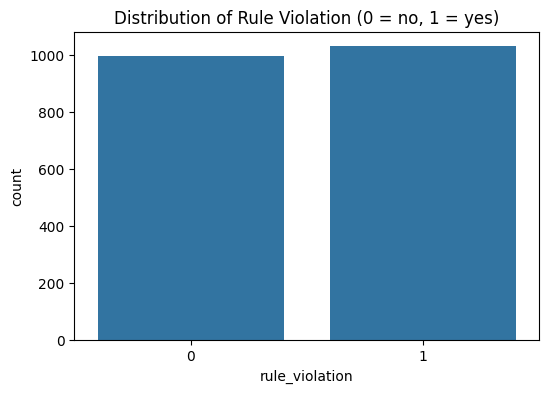

Overall violation rate: 0.508


In [27]:
n_rules      = train_df['rule'].nunique()
n_subreddits = train_df['subreddit'].nunique()
print(f"Number of unique rules:      {n_rules}")
print(f"Number of unique subreddits: {n_subreddits}")

plt.figure(figsize=(6,4))
sns.countplot(x='rule_violation', data=train_df)
plt.title('Distribution of Rule Violation (0 = no, 1 = yes)')
plt.show()

rate_overall = train_df['rule_violation'].mean()
print(f"Overall violation rate: {rate_overall:.3f}")

In [28]:
display(train_df["rule"].unique())

array(['No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.',
       'No legal advice: Do not offer or request legal advice.'],
      dtype=object)

Data set is pretty balanced, just 2 rules to evaluate 